# Analysing stochastic processes

In following we use previously introduced power spectral density and autocorrelation functions to quantitatively describe evolution of particle postions and velocity.

The simulation code was used previously.
Import libraries:

In [123]:
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
plt.style.use('ggplot') # use "ggplot" style for graphs
% matplotlib inline

Define parameters and variables:

In [124]:
dim = 3 # dimensionality of the problem
nump = 1000 # number of independent particles
nums = 1024 # number of simulation steps
dt = 0.05 # time increment
F_drift = np.asarray([0, 0, 0]) # Optional constant drift term, breaks symmetry
zeta = 1.0
m = 1.0
kBT = 1.0 # set constants to 1.0
std = np.sqrt(2*kBT*zeta*dt) # ~ mmagnitude of random force fluctuation
np.random.seed(0)
R = np.zeros([nump, dim]) # current position
V = np.zeros([nump, dim]) # current velocity
W = np.zeros([nump, dim]) # ~ current ranmdom force
Rs = np.zeros([nums, nump, dim]) # all positions
Vs = np.zeros([nums, nump, dim]) # all velocities
Ws = np.zeros([nums, nump, dim]) # all random forces
time = np.zeros([nums]) # all times

Perform simulation:

In [125]:
for i in range(nums):
    W = std*np.random.randn(nump, dim) # generate zero mean normally distributed random forces with prescribed variance
    
    #Euler Scheme
    V = V*(1-zeta/m*dt) + W/m #+ F_drift/m
    R = R + V*dt
    
#     # Runge-Kutta Second order scheme:
#     V1 = V*(1-zeta/m*0.5*dt)
#     V = V-V1*zeta/m*dt + W/m + F_drift/m # evolve velocity 
#     R = R + V1*dt # evolve position
    
#     # Runge-Kutta 4th order scheme - to be verified
#     V1 = V*(1-zeta/m*0.5*dt)
#     V2 = V-zeta/m*0.5*dt*V1
#     V3 = V-zeta/m*0.5*dt*V2
#     V4 = V-zeta/m*dt*(V + V1 + V2 + V3)/4.0 +W/m + F_drift/m
#     R = R + dt*(V + V1 + V2 + V3)/4.0 # can switch R, V; adjust to 6. factor
#     V = V4
    
    Rs[i, :, :] = R
    Vs[i, :, :] = V
    Ws[i, :, :] = W # store current values
    time[i] = dt * i

Plot particle positions evolution in time.

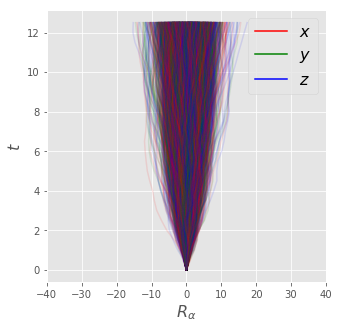

In [34]:
box=80. # set draw area as box^2
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_xlabel(r"$R_{\alpha}$", fontsize=16) # set x-label
ax.set_ylabel(r"$t$", fontsize=16) # set y-label
ax.set_xlim(-box/2,box/2) # set x-range
ts = 10 # draw every tenth
for p in range(nump):
    lx, = ax.plot(Rs[::ts, p, 0], time[::ts], 'r', alpha = 0.1) # plot trajectories in 2D
    ly, = ax.plot(Rs[::ts, p, 1], time[::ts], 'g', alpha = 0.1) 
    lz, = ax.plot(Rs[::ts, p, 2], time[::ts], 'b', alpha = 0.1)
leg = ax.legend([lx,ly,lz], [r"$x$", r"$y$", r"$z$"], loc = 0, fontsize =16)
for l in leg.get_lines():
    l.set_alpha(1)
plt.show()

We immediately see that the position is isotropic with zero mean and time-dependent variance. Next, we plot the distribution of the postitions at $t = t_{end}$ and compare it with theoretical results:

\begin{eqnarray}
P(R_\alpha,t)&=&\frac{1}{\sqrt{4\pi Dt}}\exp\left[-\frac{R_\alpha^2}{4Dt}\right]\\
&=&\frac{1}{\sqrt{2\pi \sigma^2}}\exp\left[-\frac{R_\alpha^2}{2\sigma^2}\right],
\end{eqnarray}

with $\langle R_{\alpha} \rangle = 0$ and $\sigma^2=\frac{2k_BT t}{\zeta}=2Dt$.

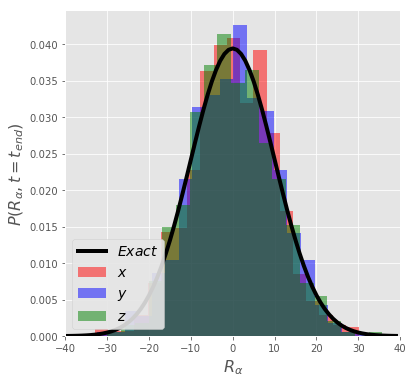

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel(r"$R_{\alpha}}(t=t_{end})$", fontsize=16)
ax.set_ylabel(r"$P(R_{\alpha},t=t_{end})$", fontsize=16)
# plot posiiton histograms at the last time step
ax.hist(Rs[-1,:,0], bins=20,normed=True,color='r',alpha=0.5,lw=0,label=r"$x$")
ax.hist(Rs[-1,:,1], bins=20,normed=True,color='b',alpha=0.5,lw=0,label=r"$y$")
ax.hist(Rs[-1,:,2], bins=20,normed=True,color='g',alpha=0.5,lw=0,label=r"$z$")

#Exact
ave = 0
var = 2*kBT*nums*dt/zeta
x = np.arange(-40, 40, 1)
y = np.exp(-(x-ave)**2/(2*var))/np.sqrt(2*np.pi*var)

ax.plot(x,y,lw=4,color='k',label=r"$Exact$")
ax.legend(fontsize=14,loc=3, framealpha=0.9)
ax.set_xlim(-40,40)
plt.show()

We see that the results are in good agreement and the particle positions are described distributed by the previously intorduced pdf.

Next, we inspect particle velocities at all times

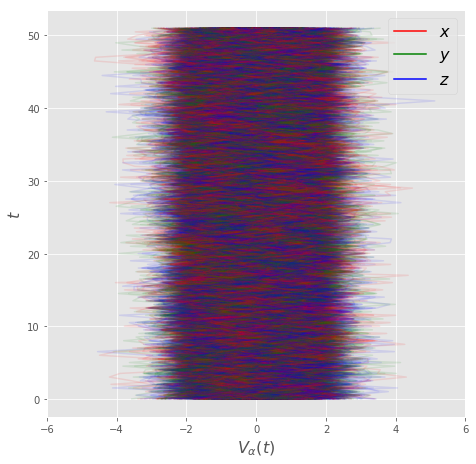

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(7.5,7.5))
ax.set_xlabel(r"$V_{\alpha}(t)$", fontsize=16) # set x-label
ax.set_ylabel(r"$t$", fontsize=16) # set y-label
ax.set_xlim(-6,6) # set x-range
ts = 10 # draw every tenth
for p in range(nump):
    lx, = ax.plot(Vs[::ts, p, 0], time[::ts], 'r', alpha = 0.1) # plot trajectories in 2D
    ly, = ax.plot(Vs[::ts, p, 1], time[::ts], 'g', alpha = 0.1) 
    lz, = ax.plot(Vs[::ts, p, 2], time[::ts], 'b', alpha = 0.1)
leg = ax.legend([lx,ly,lz], [r"$x$", r"$y$", r"$z$"], loc = 0, fontsize =16)
for l in leg.get_lines():
    l.set_alpha(1)
plt.show()

We can see that the velocities are agiain normally distributed, this time with time-independent variance. As the dsitribution is stationary, we can aggregate statistics over prticles and also over arbitrary period of the time interval. These can be tean compared with the theoretical distribution of particle velocity which is given by the **Maxwel-Boltzmann distribution**:

$$ P(V_{\alpha})=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{\left(V_{\alpha}-\langle V_{\alpha}\rangle\right)^2}{2\sigma^2}\right]\ \ \ \ \ (\alpha=x,y,z) $$
$$ \langle V_{\alpha}\rangle=0,\ \ \ \ \ \sigma^2=\frac{k_BT}{m} $$

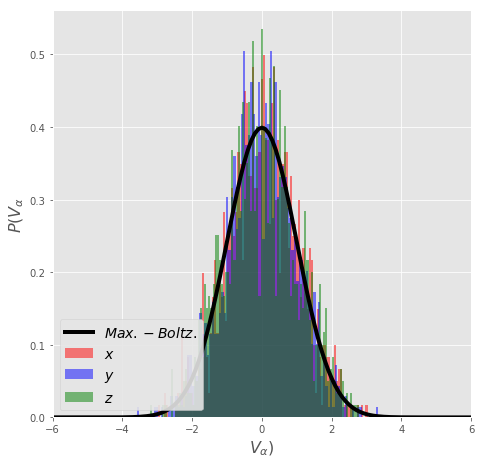

In [49]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$V_{\alpha})$", fontsize=16)
ax.set_ylabel(r"$P(V_{\alpha}$", fontsize=16)
# plot posiiton histograms for all particles and second half of  the simulation
# // is integer division :)
ax.hist(Vs[nums//2,:,0].flatten(), bins=100,normed=True,color='r',alpha=0.5,lw=0,label=r"$x$")
ax.hist(Vs[nums//2,:,1].flatten(), bins=100,normed=True,color='b',alpha=0.5,lw=0,label=r"$y$")
ax.hist(Vs[nums//2,:,2].flatten(), bins=100,normed=True,color='g',alpha=0.5,lw=0,label=r"$z$")

#Exact
ave = 0
var = kBT/m
x = np.arange(-10, 10, 0.1)
y = np.exp(-(x-ave)**2/(2*var))/np.sqrt(2*np.pi*var)

ax.plot(x,y,lw=4,color='k',label=r"$Max.-Boltz.$")
ax.legend(fontsize=14,loc=3, framealpha=0.9)
ax.set_xlim(-6,6)
plt.show()

Previously, we have derived velocity autocorrelation function of stationary process as:

$$\varphi_V(t) = \Big\langle\mathbf{V}(0) \cdot \mathbf{V}(t) \Big\rangle =  \frac{3\tilde{D}}{\zeta m}\exp\left[-\frac{\zeta}{m}|t|\right] =\frac{3k_BT}{m}\exp\left[-\frac{\zeta}{m}|t|\right].$$

We can now compare the simulation results with the theory:

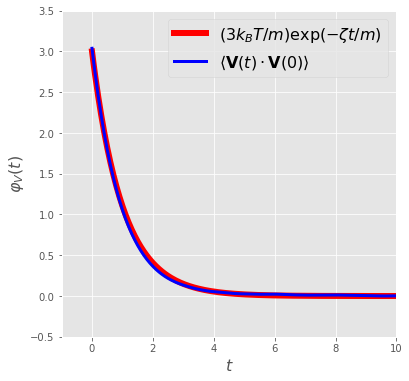

In [126]:
## Compute autocorrelation
def auto_correlate(x, do_scale = False):
    cor = np.correlate(x, x, mode = "full")/len(x) # correlate returns even array [0:2*len(x)-1] centered at len(x)-1
    if do_scale:
        cor = cor / np.var(x)
    return cor[len(x)-1:]

corr = np.zeros([nums])
for p in range(nump):
    for d in range(dim):
        corr = corr + auto_correlate(Vs[:,p,d])
corr = corr /nump # normalize

fig, ax = plt.subplots(1, 1, figsize = (6,6))
exact = (dim*kBT/m*np.exp(-zeta/m*time))
ax.plot(time,exact,'r',lw=6, label=r'$(3k_BT/m)\exp(-\zeta t/m)$')
ax.plot(time,corr,'b',lw=3,label=r'$\langle\mathbf{V}(t)\cdot \mathbf{V}(0)\rangle$')
ax.set_xlabel(r"$t$", fontsize=16)
ax.set_ylabel(r"$\varphi_V(t)$", fontsize=16)
ax.set_xlim(-1,10)
ax.set_ylim(-0.5,3.5)
ax.legend(fontsize=16)
plt.show()

We observe good agreement with theory. The autocovariance of veleocity is exponentially decaying function in time. We quickly loose ability to predict new velocity from the previous value at increasing separation in time.

Green-Kubo formula gives relationship between diffusion constant and the velocity autocorrelation function as:

$$D = \frac{1}{3} \int_{0}^{\infty} \varphi_v(t) dt.$$

We can thus compute $D$ and check for agreement with theoretical value $\frac{k_BT}{\zeta}$.

In [127]:
print("D = ", kBT/zeta, " (Theoretical)")
print("D = ", np.trapz(corr, dx = dt)/3, " (Simulation via Green-Kubo)")

D =  1.0  (Theoretical)
D =  0.944777284634  (Simulation via Green-Kubo)


#### Power spectrum of particle velocity
By taking Fourier transform of Langevin equation we have arrived to equation for power spectrum of particle velocity:
$$S_V(\omega)=\lim_{\tau\rightarrow \infty}\frac{1}{\tau}\lvert\mathbf{\tilde{V}}_\tau(\omega)\rvert^2=\frac{6 k_BT}{m}\frac{\frac{\zeta}{m}}{\omega^2+\Big(\frac{\zeta}{m}\Big)^2} =\frac{6 k_BT}{m}\frac{\gamma}{\omega^2+\Big(\gamma\Big)^2}$$
$$\mathbf{\tilde{V}}_{\tau}(\omega) = \int_{0}^{\tau} \mathrm{d}t \mathbf{V}(t) e^{i\omega t}.$$

We can now plot simulation results and compare it with the theoretical predicition:

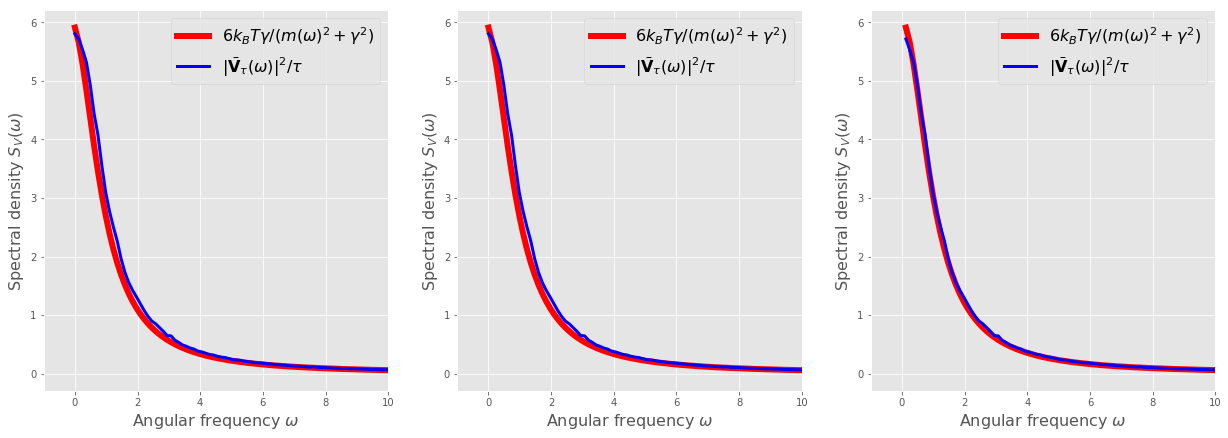

In [121]:
# Alternative #1
from numpy import fft
def psd(x, dt):
    Xw = fft.fft(x)*dt # Fourrier transform
    Sw = np.abs(Xw[:len(x)//2])**2 / (len(x)*dt) # one sided scaled spectral density
    return Sw

Pxx = np.zeros([nums//2])
for p in range(nump):
    for d in range(dim):
        Pxx = Pxx + psd(Vs[:,p,d],dt)
Pxx1 = Pxx / nump # scale for number of particles
freqs = fft.fftfreq(nums, d=dt)[:nums//2]
omegas1 = freqs * 2*np.pi # convert to oemgas

# # Alternative #2
from scipy.fftpack import fft, fftfreq
## https://dsp.stackexchange.com/questions/32187/what-should-be-the-correct-scaling-for-psd-calculation-using-tt-fft
Pxx = np.zeros([nums//2])
for p in range(nump):
    for d in range(dim):
        y = Vs[:,p,d]
        pxx = (np.abs(fft(y)))**2 # get power spectrum, only real
        pxx = pxx[:len(y)//2] / (1/dt *len(y)) # apply scaling (rectangular window function)
        Pxx = Pxx + pxx
Pxx = Pxx / nump
freqs = fftfreq(Vs.shape[0], d = dt)[:Vs.shape[0]//2]
Pxx2 = Pxx[freqs>=0]
freqs = freqs[freqs>=0]
omegas2 = freqs * 2*np.pi

# Alternative # 3
Pxx = np.zeros([nums//2])
from scipy.signal import welch, periodogram
for p in range(nump):
    for d in range(dim):
        freqs, pxx = periodogram(Vs[:,p,d], 1/dt, scaling = 'density', return_onesided = True)
        Pxx = Pxx + pxx[1:]/2 # divide by two for onesided spectrum
Pxx3 = Pxx / nump
omegas3 = freqs[1:] * 2*np.pi

gamma = zeta/m
exact = 6.0*kBT/m*gamma/(omegas**2 + gamma**2)

fig, axes = plt.subplots(1, 3, figsize=(21,7))

Omegas = [omegas1, omegas2, omegas3]
Pxxs = [Pxx1, Pxx2, Pxx3]
for omegas, Pxx, ax in zip(Omegas, Pxxs, axes):
    ax.plot(omegas,exact,'r',lw=6,label=r'$6k_BT\gamma/(m(\omega)^2+\gamma^2)$')                         
    ax.plot(omegas,Pxx,'b',lw=3,label=r'$|\mathbf{\tilde{V}}_{\tau}(\omega)|^2 / \tau$')
    ax.set_xlabel(r"Angular frequency $\omega$", fontsize=16)
    ax.set_ylabel(r"Spectral density $S_V(\omega)$", fontsize=16)
    ax.legend(fontsize=16)
    ax.set_xlim(-1, 10)
    #plt.ylim(-1, 8)
plt.show()

We observe good agreement between numerically obtained data and the theoretical prediction. Additionally, we have validated three different alternatives how to obtain PSD.